In [11]:
import pandas as pd

load = pd.read_csv("scenario_data-aggr/electricload.csv").drop(columns=["Unnamed: 0"])
solar = pd.read_csv("scenario_data-aggr/solar.csv").drop(columns=["Unnamed: 0"])
wind = pd.read_csv("scenario_data-aggr/windonshore.csv").drop(columns=["Unnamed: 0"])
load

,time,hour,dayofweek,month,North,West,East
0,01/01/2015 00:00,0,3,1,74997.89833,150417.2000,102972.160000
1,01/01/2015 01:00,1,3,1,74065.07333,144913.8125,98909.105000
2,01/01/2015 02:00,2,3,1,70456.97667,137344.7425,95800.825000
3,01/01/2015 03:00,3,3,1,68705.88000,132415.1700,95027.550000
4,01/01/2015 04:00,4,3,1,68003.73167,131099.4175,95660.950000
...,...,...,...,...,...,...,...
43819,31/12/2019 19:00,19,1,12,95015.29000,159746.4625,117217.765833
43820,31/12/2019 20:00,20,1,12,91124.51667,151009.1975,112196.498333
43821,31/12/2019 21:00,21,1,12,87112.68833,147458.2375,110252.860833
43822,31/12/2019 22:00,22,1,12,81783.57167,146397.9125,106505.581667


In [72]:
index = 13022
region = "North"

load_filtered = load.iloc[index:index+5]
solar_filtered = solar.iloc[index:index+5]
wind_filtered = wind.iloc[index:index+5]

df_merged = load_filtered[["hour"]]
df_merged["Load"] = load_filtered[region]
df_merged["Wind"] = wind_filtered[region] * 100
df_merged["Solar"] = solar_filtered[region] * 100

df_merged["Load rank"] = df_merged["Load"].rank(method="first")
df_merged["Solar rank"] = df_merged["Solar"].rank(method="first")
df_merged["Wind rank"] = df_merged["Wind"].rank(method="first")

df_merged["Load rank values"] = df_merged["Load rank"] / len(df_merged)
df_merged["Solar rank values"] = df_merged["Solar rank"] / len(df_merged)
df_merged["Wind rank values"] = df_merged["Wind rank"] / len(df_merged)

df_merged["hour"] = [1,2,3,4,5]
df_merged = df_merged.reset_index(drop=True)
df_merged

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_4967/2870202104.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["Load"] = load_filtered[region]
/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_4967/2870202104.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["Wind"] = wind_filtered[region] * 100
/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_4967/2870202104.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,hour,Load,Wind,Solar,Load rank,Solar rank,Wind rank,Load rank values,Solar rank values,Wind rank values
0,1,75232.24667,24.20,31.5,1.0,5.0,2.0,0.2,1.0,0.4
1,2,76836.05667,25.63,22.6,3.0,4.0,4.0,0.6,0.8,0.8
2,3,77825.31167,25.87,16.2,5.0,3.0,5.0,1.0,0.6,1.0
3,4,77305.54833,24.59,10.6,4.0,2.0,3.0,0.8,0.4,0.6
4,5,76150.72667,23.63,5.7,2.0,1.0,1.0,0.4,0.2,0.2


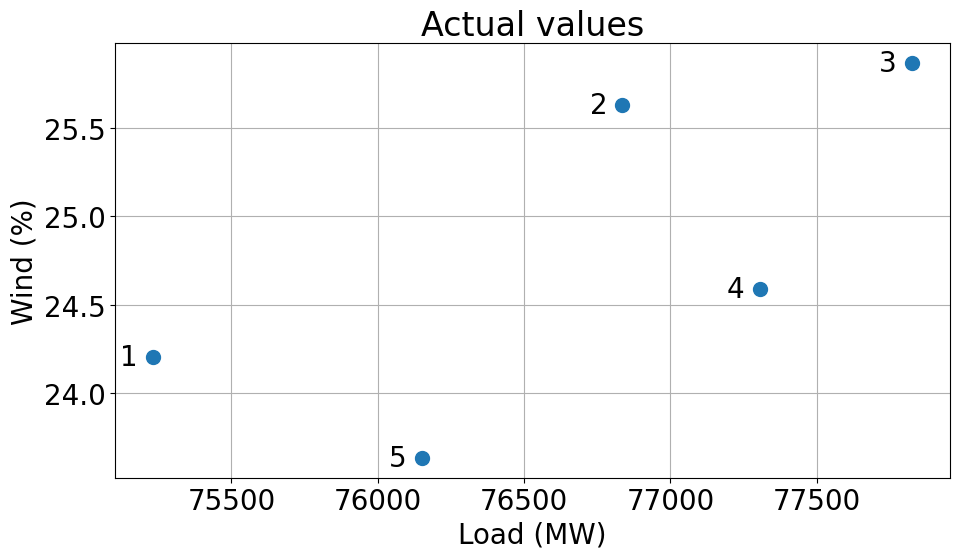

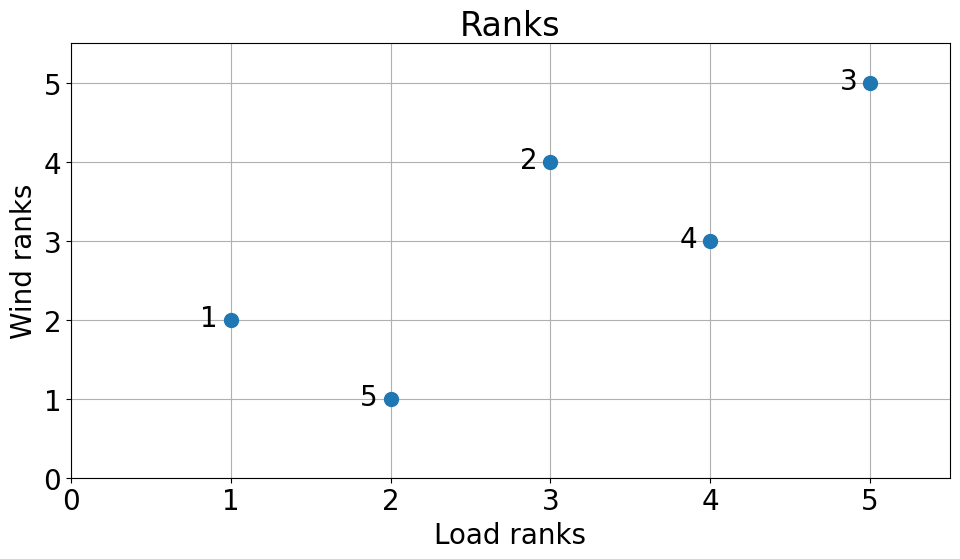

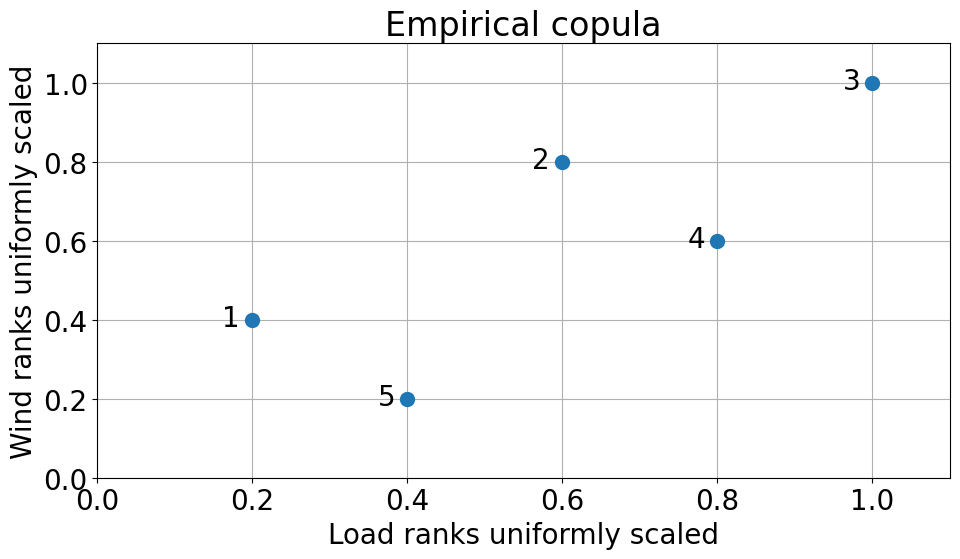

In [106]:
import matplotlib.pyplot as plt

ITERATIONS = {
    "Actual values": "",
    "Ranks": " rank",
    "Empirical copula": " rank values"
}


for k, v in ITERATIONS.items():
    # Plot
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(10, 6))
    
    # Scatter plot
    x = df_merged[f"Load{v}"]
    y = df_merged[f"Wind{v}"]
    plt.scatter(x, y, s=100, zorder=999, label=hour_idx)
    
    # Annotate each point with the hour_idx
    hour_idx = 0
    for i in range(len(x)):
        x_position_fix = (max(x) - min(x)) / 50
        y_position_fix = (max(y) - min(y)) / 50
        plt.text(x[i] - x_position_fix, y[i] - y_position_fix, str(hour_idx + 1), fontsize=20, ha='right')
        hour_idx += 1
    
    # Plot title and labels
    plt.title(k)

    if k == "Actual values":
        unit_x = " (MW)"
        unit_y = " (%)"
    elif k == "Ranks":
        unit_x = " ranks"
        unit_y = " ranks"
    else:
        unit_x = " ranks uniformly scaled"
        unit_y = " ranks uniformly scaled"
    plt.xlabel(f"Load{unit_x}")
    plt.ylabel(f"Wind{unit_y}")
    
    # Adjust plot limits
    if k == "Ranks":
        plt.xlim(0, 5.5)
        plt.ylim(0, 5.5)
    elif k == "Empirical copula":
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
    
    plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the layout to make consistent across plots
    
    # Show grid and save plot
    plt.grid(True)
    plt.savefig(f"RankPlots/{k}", bbox_inches="tight")
    plt.show()
